# EDA Анализ данных

In [1]:
!pip install --upgrade pip
!pip install pandas matplotlib seaborn
!pip install scikit-learn xgboost
!pip install pandas

# !conda install pandas matplotlib seaborn scikit-learn xgboost -y

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
# Load the dataset
data_path = "./pricerunner_aggregate.csv"
df = pd.read_csv(data_path)

# Display basic information about the dataset
df.info()


# Display the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
df.describe()

,Product ID,Merchant ID,Cluster ID,Category ID
count,35311.000000,35311.000000,35311.000000,35311.000000
mean,26150.800176,120.501883,30110.687633,2618.142930
std,13498.191220,117.045557,18410.265642,3.600708
min,1.000000,1.000000,1.000000,2612.000000
25%,14958.500000,17.000000,6123.000000,2615.000000
50%,27614.000000,75.000000,40630.000000,2619.000000
75%,37508.500000,253.000000,44059.000000,2622.000000
max,47358.000000,371.000000,47525.000000,2623.000000


In [5]:
df[' Cluster Label']

0        Apple iPhone 8 Plus 64GB
1        Apple iPhone 8 Plus 64GB
2        Apple iPhone 8 Plus 64GB
3        Apple iPhone 8 Plus 64GB
4        Apple iPhone 8 Plus 64GB
                   ...           
35306            Smeg FAB28 Cream
35307              Smeg FAB28 Red
35308             Smeg FAB28 Pink
35309               Candy CRU16.0
35310                  Neff K4316
Name:  Cluster Label, Length: 35311, dtype: object

In [6]:
df.isnull().sum()

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name:  Category Label, dtype: int64


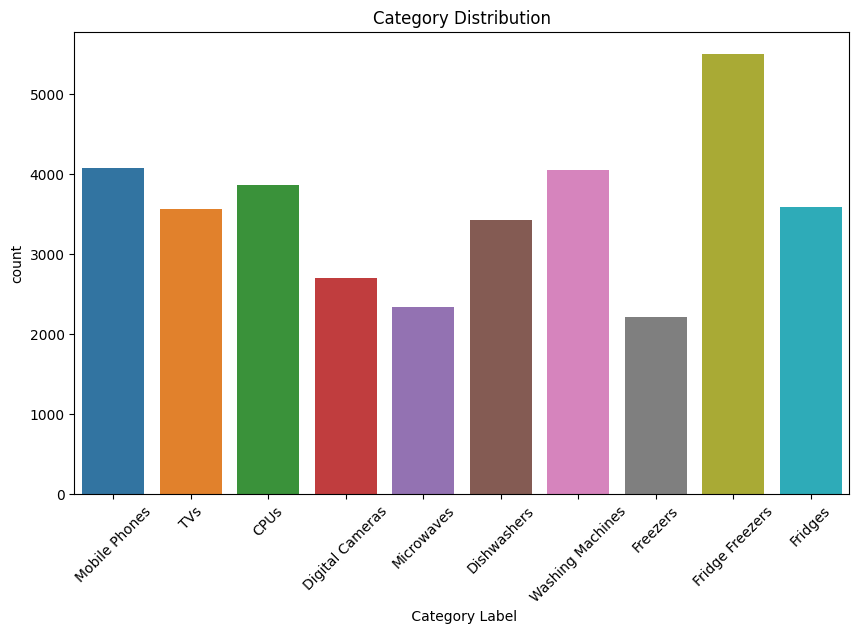

In [7]:
class_distribution = df[' Category Label'].value_counts()
print(class_distribution)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=' Category Label', data=df)
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

<Figure size 1200x800 with 0 Axes>

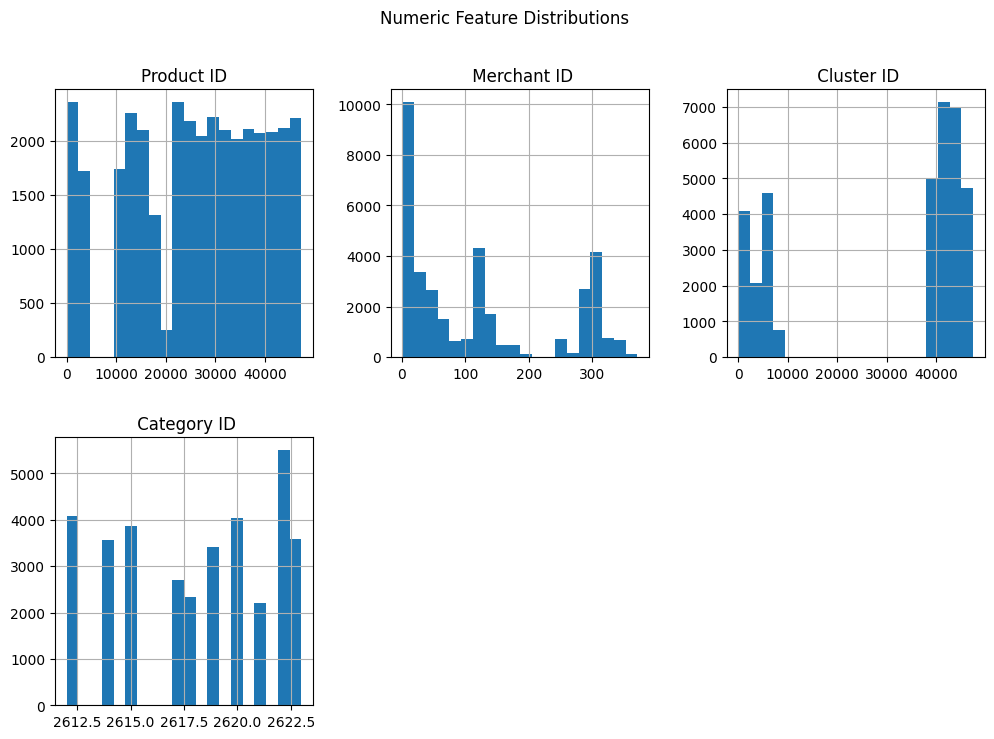

In [8]:
# Visualize the distribution of numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
df[numeric_cols].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Numeric Feature Distributions')
plt.show()



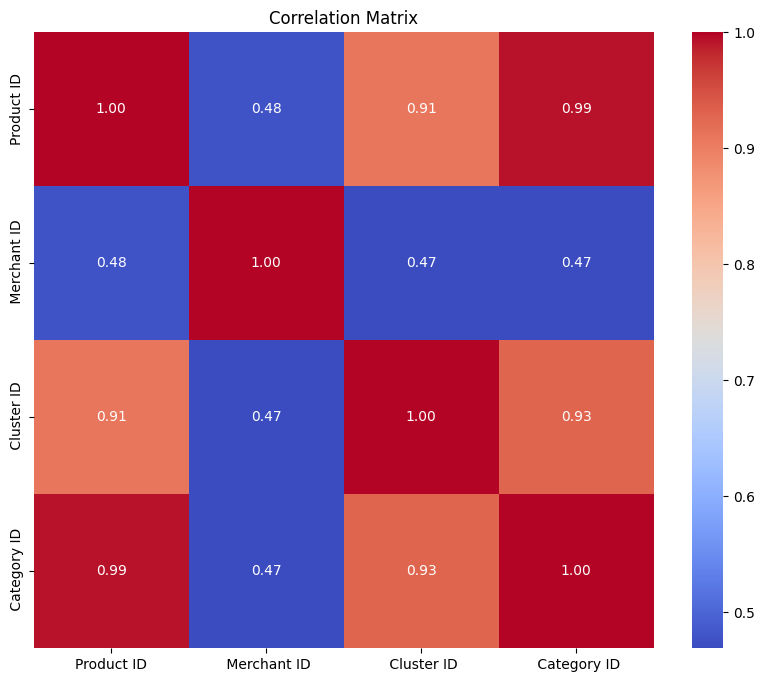

In [9]:
# Visualize categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols# Correlation matrix for numeric features
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


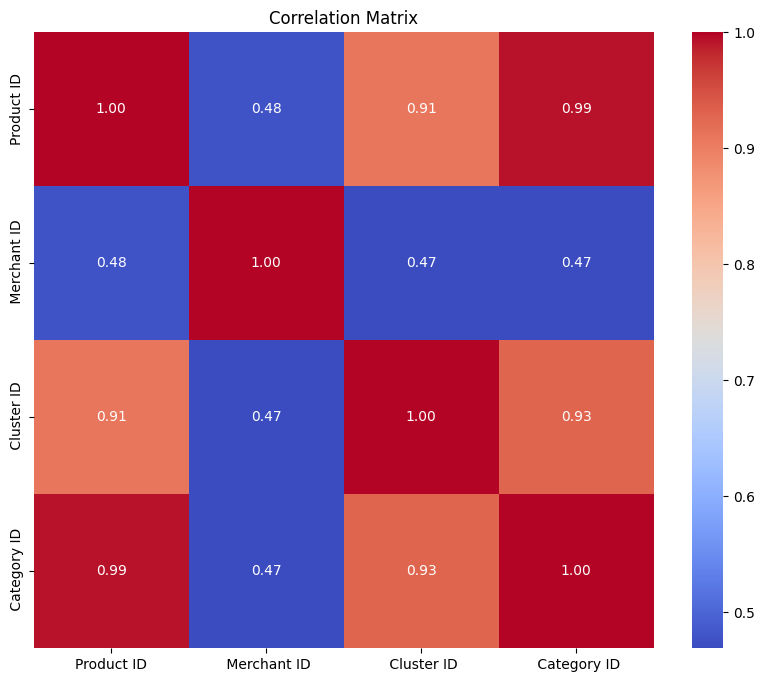

In [10]:
# Correlation matrix for numeric features
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [11]:
df.sample(10)

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
25971,36949,uig1313 liebherr freezer built under,344,43781,Liebherr GUI1313-22 White,2621,Freezers
18472,28583,aeg fse21200p integrated compact dishwasher,186,40876,AEG FSE21200P Integrated,2619,Dishwashers
30062,41681,bosch stand k hl /gefrierkombination edelstahl...,298,44916,Bosch KGN56XI40 Stainless Steel,2622,Fridge Freezers
7421,13545,hisense 65 inch hdr widescreen 4k smart led tv...,17,5616,Hisense H65M7000,2614,TVs
5944,11962,lg 49lv661h 49 full hd 400cd/m smart tv black ...,45,4687,LG 49LV661H,2614,TVs
2181,2187,beafon c240 eu001b c240 black unlocked,17,406,Bea-fon C240 Dual SIM,2612,Mobile Phones
24074,34794,blomberg fne1531p frost free undercounter freezer,292,43267,Blomberg FNE1531P White,2621,Freezers
23517,34221,gorenje wdi73120,330,42705,Gorenje WDI73120 HK,2620,Washing Machines
4128,10084,samsung ue75nu8000 75 4k premium ultrahd smart...,131,4421,Samsung UE75NU8000,2614,TVs
33109,45005,liebherr tb 1400 under counter fridge comfort,294,46357,Liebherr Tb 1400 Black,2623,Fridges


## Feature Engineering

In [12]:
# Word count feature
df['word_count'] = df['Product Title'].apply(lambda x: len(str(x).split()))

# Character count feature
df['char_count'] = df['Product Title'].apply(lambda x: len(str(x)))

# Average word length feature
df['avg_word_length'] = df['char_count'] / df['word_count']

In [13]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label,word_count,char_count,avg_word_length
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,6,31,5.166667
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,7,35,5.000000
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,13,70,5.384615
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,7,35,5.000000
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones,11,54,4.909091


# Предобработка

In [14]:
# Identify and drop unnecessary columns
columns_to_drop = ['Product ID', ' Merchant ID', ' Cluster ID', ' Category ID']
df_cleared = df.drop(columns=columns_to_drop, axis=1)

# Display the modified dataset
df_cleared.head()


,Product Title,Cluster Label,Category Label,word_count,char_count,avg_word_length
0,apple iphone 8 plus 64gb silver,Apple iPhone 8 Plus 64GB,Mobile Phones,6,31,5.166667
1,apple iphone 8 plus 64 gb spacegrau,Apple iPhone 8 Plus 64GB,Mobile Phones,7,35,5.000000
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Apple iPhone 8 Plus 64GB,Mobile Phones,13,70,5.384615
3,apple iphone 8 plus 64gb space grey,Apple iPhone 8 Plus 64GB,Mobile Phones,7,35,5.000000
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Apple iPhone 8 Plus 64GB,Mobile Phones,11,54,4.909091


# Обучение моделей

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [16]:
# Assuming 'Category Label' is your target variable
X = df.drop(' Category Label', axis=1)
y = df[' Category Label']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

In [17]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Model 1: Random Forest
# model_rf = RandomForestClassifier()
# model_rf.fit(X_train, y_train)
# predictions_rf = model_rf.predict(X_test)
# accuracy_rf = accuracy_score(y_test, predictions_rf)
# print(f"Random Forest Accuracy: {accuracy_rf}")

# # Model 2: Support Vector Machine
# model_svm = SVC()
# model_svm.fit(X_train, y_train)
# predictions_svm = model_svm.predict(X_test)
# accuracy_svm = accuracy_score(y_test, predictions_svm)
# print(f"SVM Accuracy: {accuracy_svm}")

# # Model 3: XGBoost
# model_xgb = XGBClassifier()
# model_xgb.fit(X_train, y_train)
# predictions_xgb = model_xgb.predict(X_test)
# accuracy_xgb = accuracy_score(y_test, predictions_xgb)
# print(f"XGBoost Accuracy: {accuracy_xgb}")

In [18]:
# Use a subset of the data (adjust the fraction as needed)
subset_fraction = 0.1
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=1 - subset_fraction, random_state=42)

# One-hot encode categorical features for the subset
X_encoded_subset = pd.get_dummies(X_subset)

# Split the subset data
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_encoded_subset, y_subset, test_size=0.2, random_state=42
)

# Model 1: Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_subset, y_train_subset)
predictions_rf = model_rf.predict(X_test_subset)
accuracy_rf = accuracy_score(y_test_subset, predictions_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Model 2: Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train_subset, y_train_subset)
predictions_svm = model_svm.predict(X_test_subset)
accuracy_svm = accuracy_score(y_test_subset, predictions_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Model 3: XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train_subset, y_train_subset)
predictions_xgb = model_xgb.predict(X_test_subset)
accuracy_xgb = accuracy_score(y_test_subset, predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


Random Forest Accuracy: 0.9943422913719944
SVM Accuracy: 0.9632248939179632


ValueError: ignored

In [19]:
from sklearn.preprocessing import LabelEncoder

# Convert class names to numeric labels
label_encoder = LabelEncoder()
y_train_subset_encoded = label_encoder.fit_transform(y_train_subset)

# Model 3: XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train_subset, y_train_subset_encoded)

# Convert test set labels to numeric labels
y_test_subset_encoded = label_encoder.transform(y_test_subset)

# Make predictions and evaluate
predictions_xgb = model_xgb.predict(X_test_subset)
accuracy_xgb = accuracy_score(y_test_subset_encoded, predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 1.0


In [25]:
import joblib

joblib.dump(model_rf, 'random_forest_model.joblib')
joblib.dump(model_svm, 'svm_model.joblib')
joblib.dump(model_xgb, 'xgboost_model.joblib')

['xgboost_model.joblib']

In [ ]:
# # Load the Random Forest model
# loaded_rf_model = joblib.load('random_forest_model.pkl')

# # Load the Support Vector Machine model
# loaded_svm_model = joblib.load('svm_model.pkl')

# # Load the XGBoost model
# loaded_xgb_model = joblib.load('xgboost_model.pkl')

# # Load the LabelEncoder
# loaded_label_encoder = joblib.load('label_encoder.pkl')
